# Continuous Variables

In [34]:
# Import python packages
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import seaborn as sns
import matplotlib as plt

import functions.continuous as funcs

# Check version numbers
print(f'numpy: {np.version.version}')
print(f'pandas: {pd.__version__}')
print(f'scipy: {sp.__version__}')
print(f'scikit-learn: {sk.__version__}')
print(f'seaborn: {sns.__version__}')
print(f'matplotlib: {plt.__version__}')


numpy: 2.2.3
pandas: 2.2.3
scipy: 1.15.2
scikit-learn: 1.6.1
seaborn: 0.13.2
matplotlib: 3.10.1


In [35]:
df = pd.read_csv('../data/raw/workout_fitness_tracker_data.csv')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User ID                   10000 non-null  int64  
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Height (cm)               10000 non-null  int64  
 4   Weight (kg)               10000 non-null  int64  
 5   Workout Type              10000 non-null  object 
 6   Workout Duration (mins)   10000 non-null  int64  
 7   Calories Burned           10000 non-null  int64  
 8   Heart Rate (bpm)          10000 non-null  int64  
 9   Steps Taken               10000 non-null  int64  
 10  Distance (km)             10000 non-null  float64
 11  Workout Intensity         10000 non-null  object 
 12  Sleep Hours               10000 non-null  float64
 13  Water Intake (liters)     10000 non-null  float64
 14  Daily C

In [37]:
df.describe()

,User ID,Age,Height (cm),Weight (kg),Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%)
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.0
mean,5000.50000,38.390100,174.275100,84.903000,64.464800,552.100800,129.526700,10455.496600,7.820745,6.982820,1.900000e+00,2748.428800,69.486500,3.840000e+01,28.5
std,2886.89568,12.171637,14.440986,20.189937,31.814946,260.629908,28.874152,5486.423716,4.159148,1.708738,2.220557e-16,717.109026,11.566763,7.105783e-15,0.0
min,1.00000,18.000000,150.000000,50.000000,10.000000,100.000000,80.000000,1000.000000,0.500000,4.000000,1.900000e+00,1500.000000,50.000000,3.840000e+01,28.5
25%,2500.75000,28.000000,162.000000,67.000000,37.000000,325.000000,105.000000,5673.000000,4.240000,5.500000,1.900000e+00,2124.000000,60.000000,3.840000e+01,28.5
50%,5000.50000,38.000000,174.000000,85.000000,64.000000,554.000000,130.000000,10434.500000,7.850000,7.000000,1.900000e+00,2753.000000,69.000000,3.840000e+01,28.5
75%,7500.25000,49.000000,187.000000,102.000000,92.000000,776.000000,155.000000,15211.000000,11.410000,8.400000,1.900000e+00,3360.000000,80.000000,3.840000e+01,28.5
max,10000.00000,59.000000,199.000000,119.000000,119.000000,999.000000,179.000000,19998.000000,15.000000,10.000000,1.900000e+00,3999.000000,89.000000,3.840000e+01,28.5


In [38]:
df_cont = df[['Workout Type', 'Age', 'Height (cm)', 'Weight (kg)', 'Workout Duration (mins)', 'Calories Burned', 'Heart Rate (bpm)', 'Steps Taken', 'Distance (km)', 'Sleep Hours', 'Water Intake (liters)', 'Daily Calories Intake', 'Resting Heart Rate (bpm)', 'VO2 Max', 'Body Fat (%)']]

In [39]:
df_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Workout Type              10000 non-null  object 
 1   Age                       10000 non-null  int64  
 2   Height (cm)               10000 non-null  int64  
 3   Weight (kg)               10000 non-null  int64  
 4   Workout Duration (mins)   10000 non-null  int64  
 5   Calories Burned           10000 non-null  int64  
 6   Heart Rate (bpm)          10000 non-null  int64  
 7   Steps Taken               10000 non-null  int64  
 8   Distance (km)             10000 non-null  float64
 9   Sleep Hours               10000 non-null  float64
 10  Water Intake (liters)     10000 non-null  float64
 11  Daily Calories Intake     10000 non-null  int64  
 12  Resting Heart Rate (bpm)  10000 non-null  int64  
 13  VO2 Max                   10000 non-null  float64
 14  Body Fa

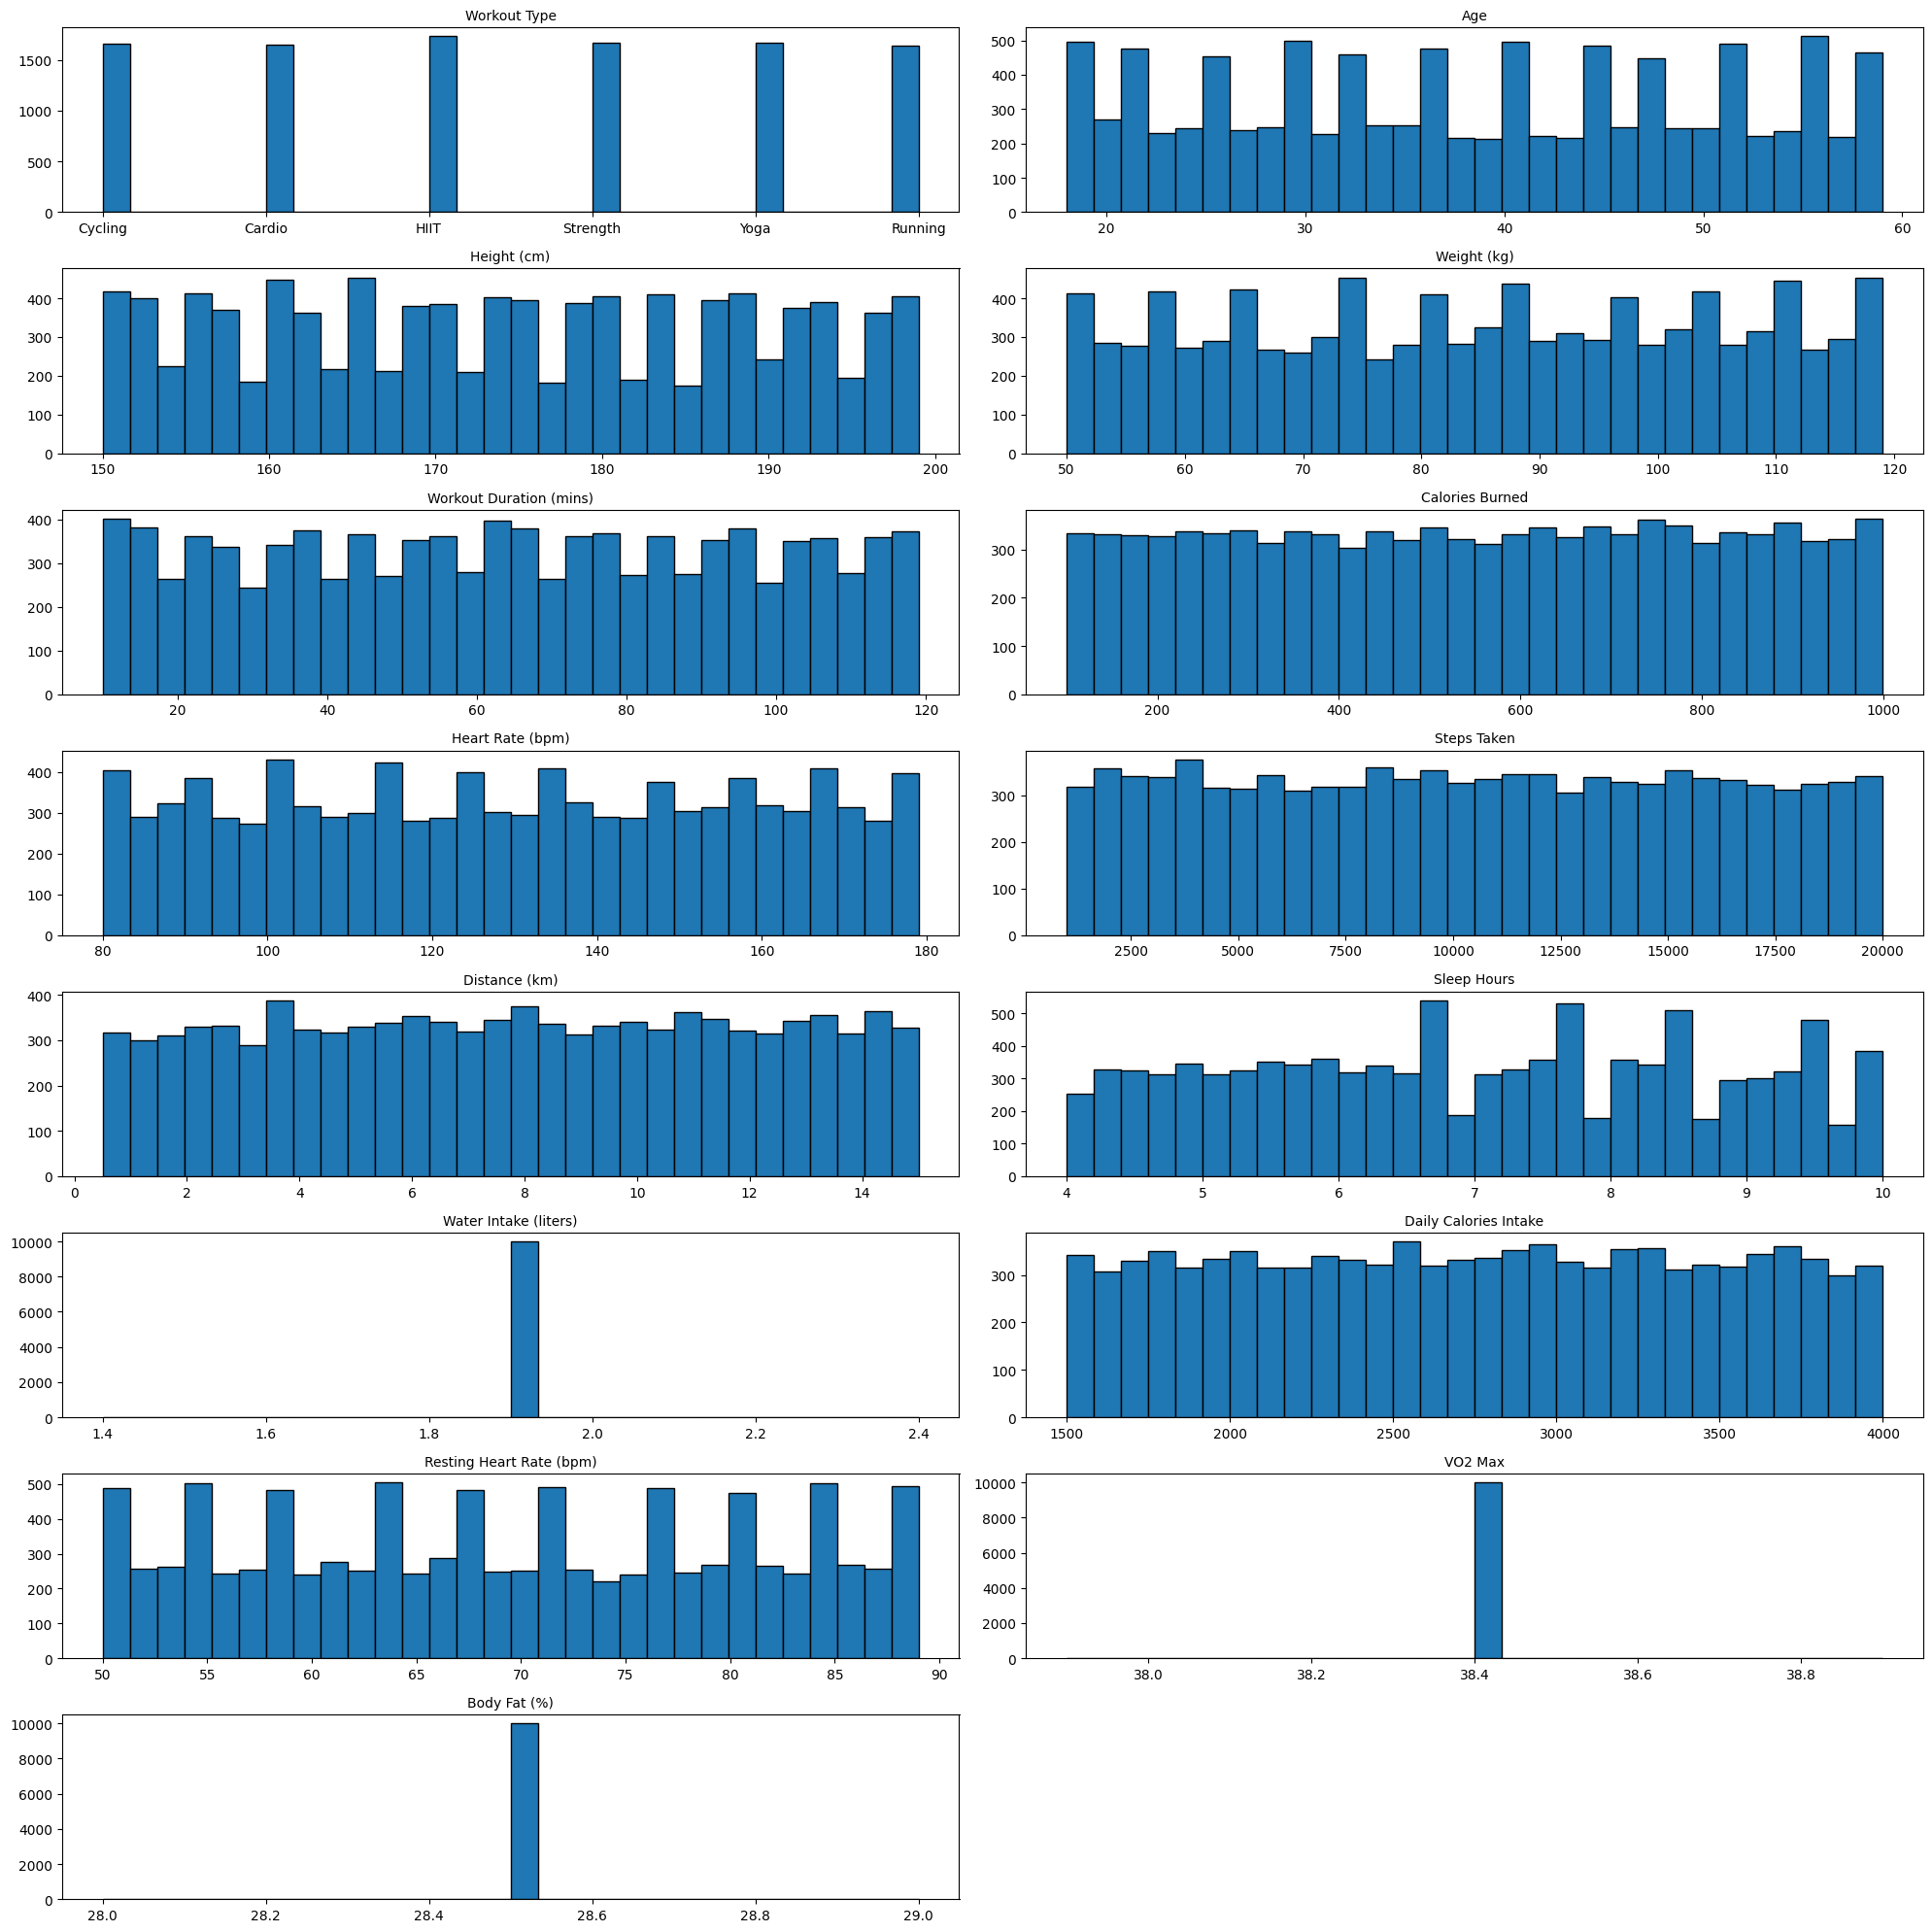

In [40]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(20, 20))
axes = axes.flatten()  # Flatten the 2D axes array for easy indexing

for i, column in enumerate(df_cont.columns):
    axes[i].hist(df_cont[column], bins=30, edgecolor='black')
    axes[i].set_title(column, fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove any unused subplots (if fewer than 14 columns)
for j in range(len(df_cont.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [41]:
#Recommendations: remove VO2 Max, Body Fat %, 
df_cont = df_cont.drop(columns=['VO2 Max', 'Body Fat (%)', 'Water Intake (liters)'])

In [42]:
df_cont.head()

,Workout Type,Age,Height (cm),Weight (kg),Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Sleep Hours,Daily Calories Intake,Resting Heart Rate (bpm)
0,Cycling,39,175,99,79,384,112,8850,14.44,8.2,3195,61
1,Cardio,36,157,112,73,612,168,2821,1.10,8.6,2541,73
2,HIIT,25,180,66,27,540,133,18898,7.28,9.8,3362,80
3,Cycling,56,154,89,39,672,118,14102,6.55,5.8,2071,65
4,Strength,53,194,59,56,410,170,16518,3.17,7.3,3298,59


In [43]:
#Focusing now on expected calories burned given workout type and duration
#As such, will need to normalize duration/kcal burned
#What do we need at this point? 
#Not sure we need step taken, distance, sleep, calories intake...



#let's do correlations- focusing on workout type, duration, kcal burned
#I want to do correlations between 

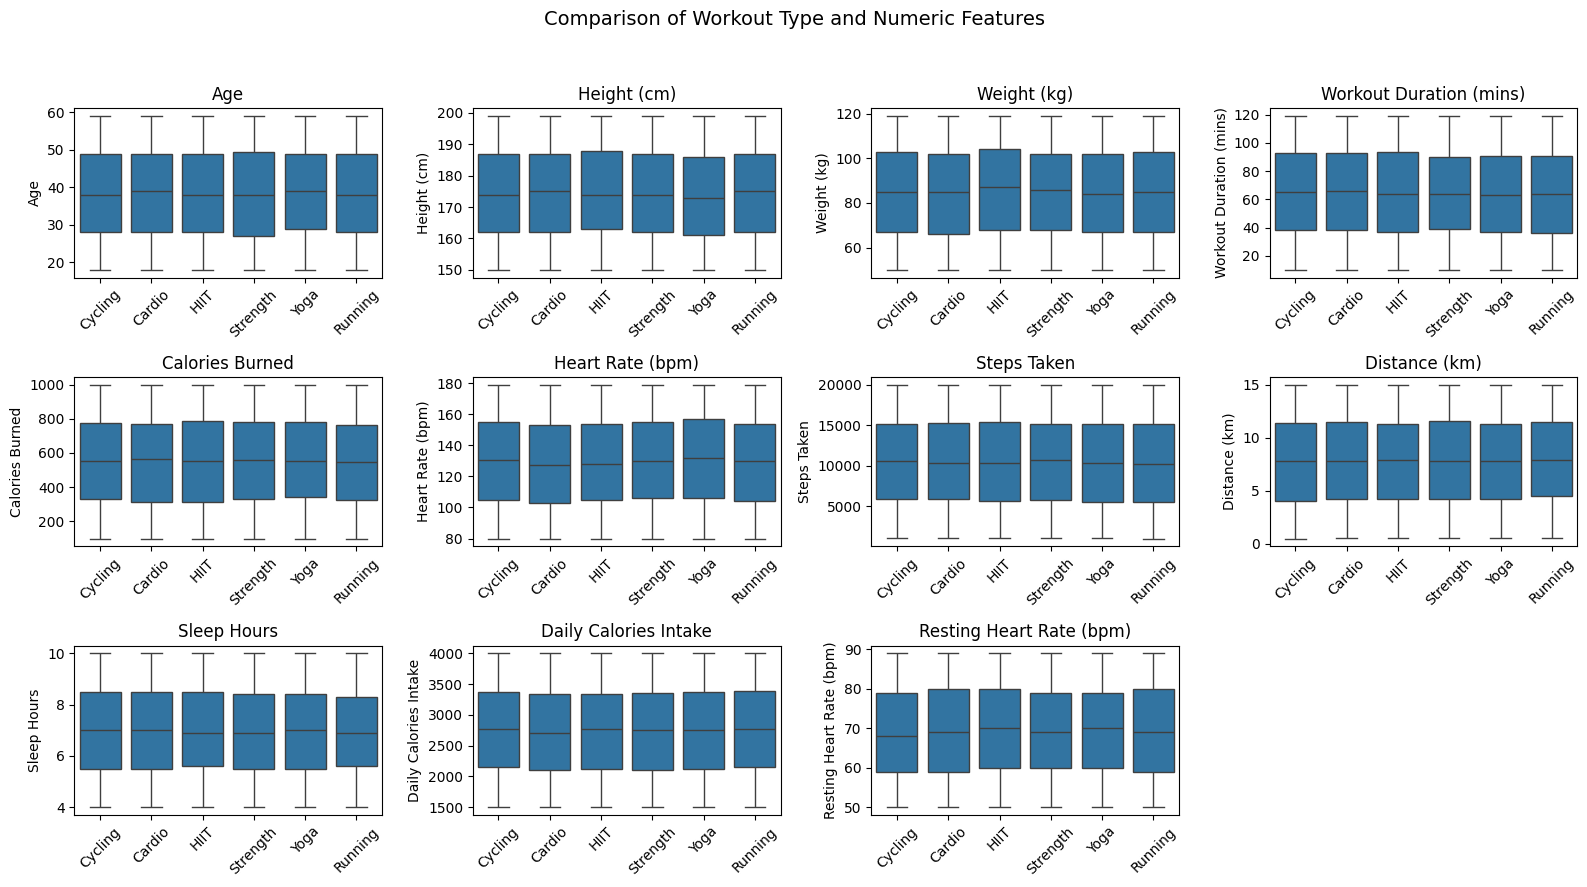

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
import pandas as pd

# Only use numeric columns
features = df_cont.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Set up subplot grid
n_features = len(features)
n_cols = 4
n_rows = -(-n_features // n_cols)  # Ceiling division

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
axs = axs.flatten()

fig.suptitle('Comparison of Workout Type and Numeric Features', fontsize=14)

for i, feature in enumerate(features):
    plot_df = df_cont[[feature, 'Workout Type']].copy()

    # Ensure the feature is numeric and drop invalid values
    plot_df[feature] = pd.to_numeric(plot_df[feature], errors='coerce')
    plot_df = plot_df[plot_df[feature].notna() & (plot_df[feature] != 0)]

    # Check for log scale based on kurtosis
    try:
        log_scale = kurtosis(plot_df[feature]) > 10
    except Exception as e:
        log_scale = False

    sns.boxplot(data=plot_df, x='Workout Type', y=feature, log_scale=log_scale, ax=axs[i])
    axs[i].tick_params(axis='x', labelrotation=45)
    axs[i].set_title(feature)
    axs[i].set_xlabel('')

# Remove unused axes
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [46]:
from itertools import product
import function as funcs
# Features to calculate correlation coefficients for
features=[
    'Age',
    'Height (cm)',
    'Weight (kg)',
    'Workout Duration (mins)',
    'Calories Burned',
    'Heart Rate (bpm)',
    'Sleep Hours',
    'Distance (km)',
    'Resting Heart Rate (bpm)',
    'Daily Calories Intake',
]

# Calculate the correlation coefficients between each pair of features
feature_pairs=list(set(tuple(sorted(pair)) for pair in product(features, features)))
correlations=funcs.get_correlations(feature_pairs, df_cont)

# Sort by Spearman rank and inspect
correlations_df=pd.DataFrame.from_dict(correlations)
correlations_df.sort_values('Spearman', inplace=True, ascending=False)
correlations_df.reset_index(inplace=True, drop=True)
correlations_df.head(len(correlations_df))

,Feature 1,Feature 2,Absolute Spearman,Spearman,Spearman p-value,Absolute Pearson,Pearson,Pearson p-value,Pearson r-squared
0,Heart Rate (bpm),Height (cm),0.021995,0.021995,0.027840,0.022059,0.022059,0.027394,4.865843e-04
1,Distance (km),Weight (kg),0.016166,0.016166,0.105976,0.016232,0.016232,0.104560,2.634894e-04
2,Distance (km),Height (cm),0.012084,0.012084,0.226936,0.011993,0.011993,0.230453,1.438321e-04
3,Distance (km),Heart Rate (bpm),0.012027,0.012027,0.229118,0.011946,0.011946,0.232303,1.426961e-04
4,Daily Calories Intake,Heart Rate (bpm),0.011384,0.011384,0.255010,0.011315,0.011315,0.257868,1.280405e-04
5,Age,Workout Duration (mins),0.010862,0.010862,0.277441,0.011027,0.011027,0.270224,1.215841e-04
6,Distance (km),Resting Heart Rate (bpm),0.010764,0.010764,0.281816,0.010726,0.010726,0.283481,1.150547e-04
7,Calories Burned,Daily Calories Intake,0.010539,0.010539,0.291994,0.010564,0.010564,0.290831,1.115987e-04
8,Height (cm),Resting Heart Rate (bpm),0.010001,0.010001,0.317329,0.010121,0.010121,0.311519,1.024428e-04
9,Calories Burned,Distance (km),0.009556,0.009556,0.339304,0.009488,0.009488,0.342793,9.001439e-05


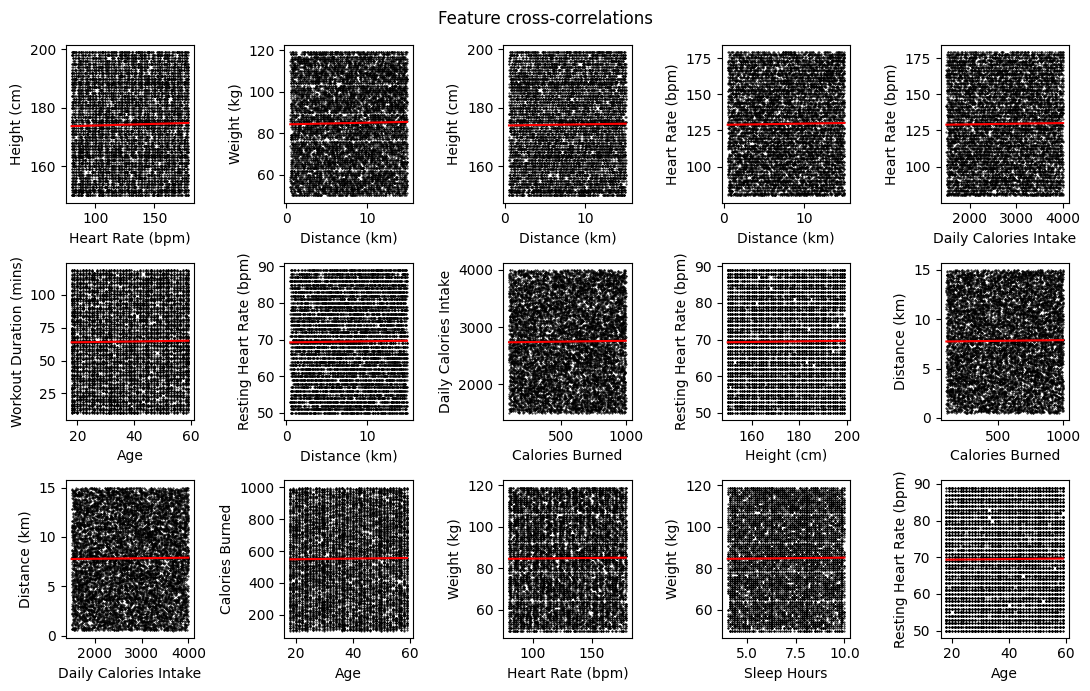

In [47]:
funcs.plot_correlations(df_cont, correlations_df)

Label Encoding Map: {'Cardio': np.int64(0), 'Cycling': np.int64(1), 'HIIT': np.int64(2), 'Running': np.int64(3), 'Strength': np.int64(4), 'Yoga': np.int64(5)}


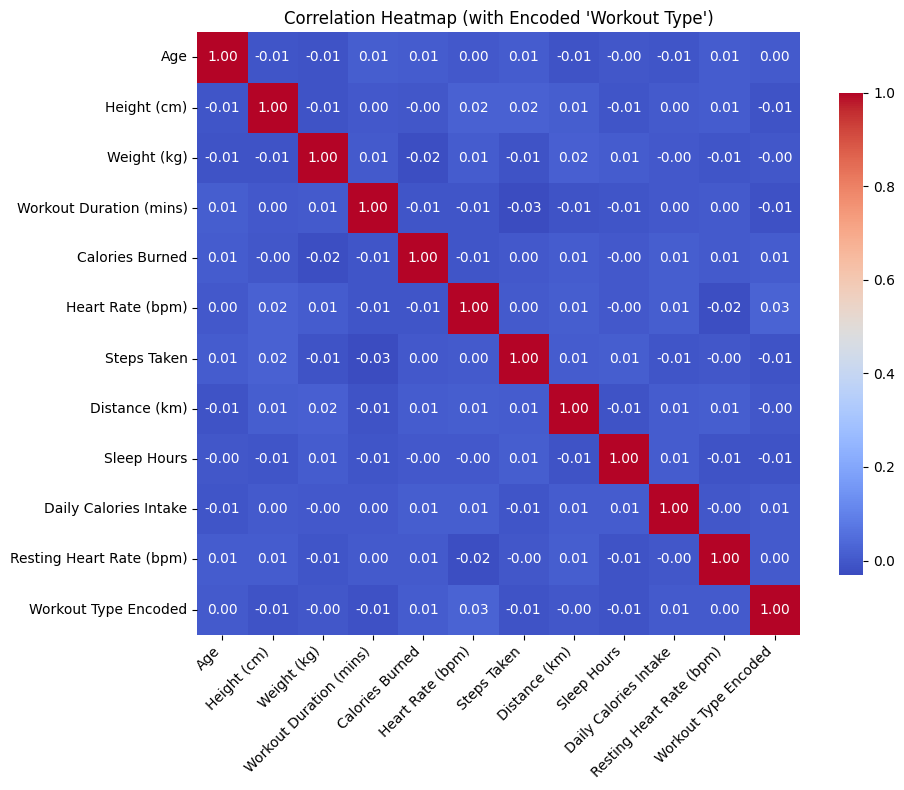

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Label encode 'Workout Type'
le = LabelEncoder()
df_cont['Workout Type Encoded'] = le.fit_transform(df_cont['Workout Type'])

# Print the label mapping
label_map = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Encoding Map:", label_map)

# Compute correlation matrix (including the encoded Workout Type)
corr_matrix = df_cont.select_dtypes(include=['float64', 'int64']).corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.8})

plt.title("Correlation Heatmap (with Encoded 'Workout Type')")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
#Challenge- calories burned includes all day- not just the workout. So that could explain why so little correlation 

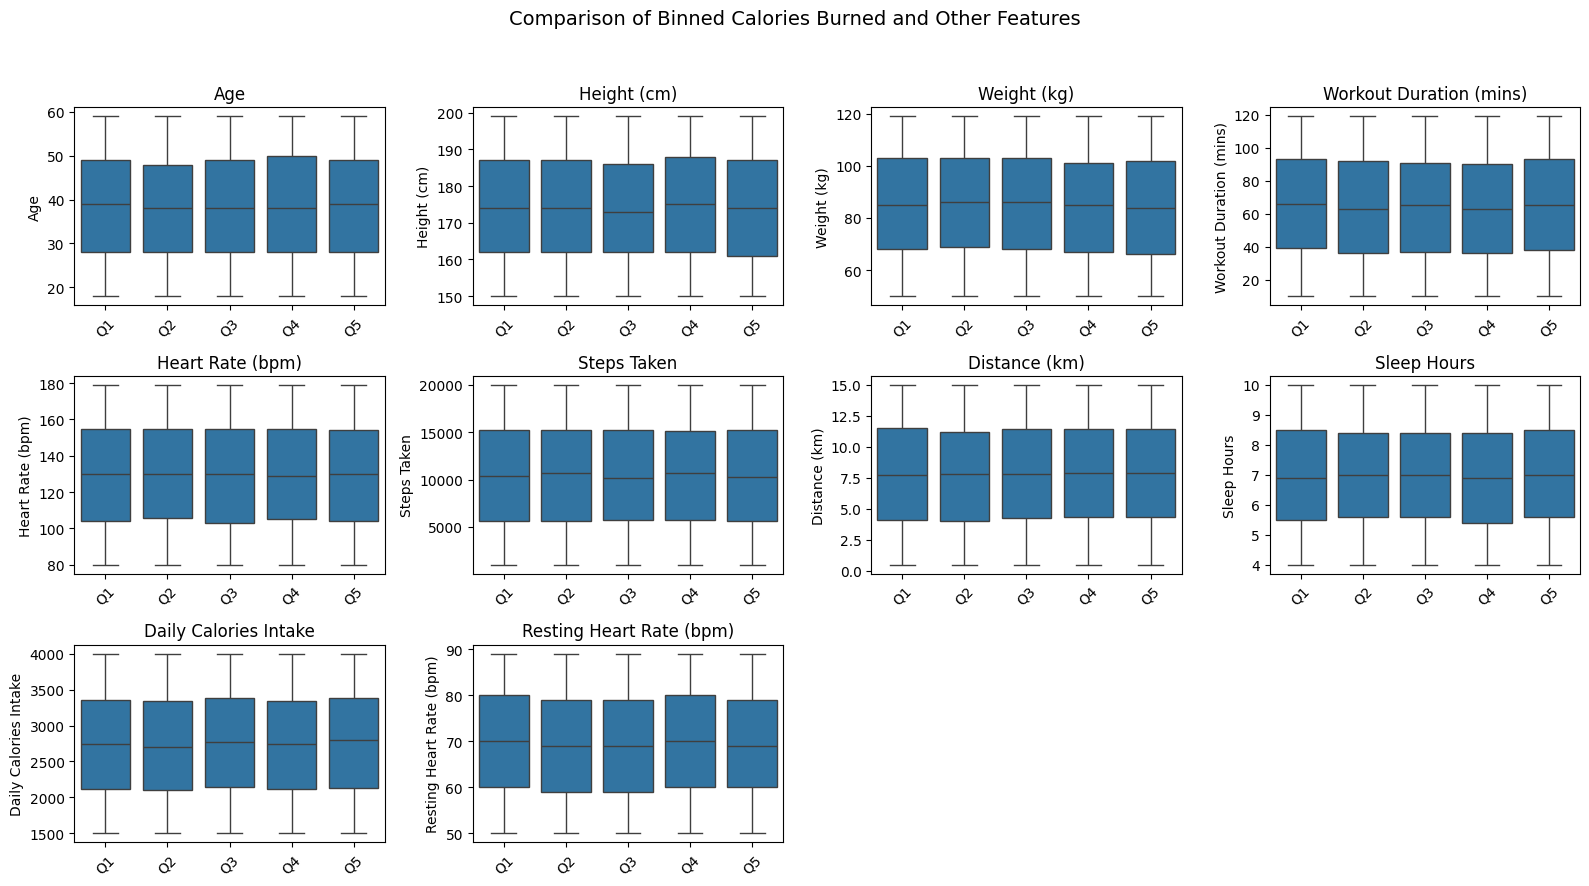

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
import pandas as pd

# Bin Calories Burned into categories (e.g., 5 bins)
df_cont['Calories Burned Binned'] = pd.qcut(df_cont['Calories Burned'], q=5, labels=[f'Q{i+1}' for i in range(5)])

# Select features (exclude Calories Burned itself and categorical fields)
features = df_cont.select_dtypes(include=['float64', 'int64']).columns.tolist()
features = [f for f in features if f not in ['Calories Burned', 'Workout Type', 'Workout Type Encoded']]

# Set up subplot grid
n_features = len(features)
n_cols = 4
n_rows = -(-n_features // n_cols)  # Ceiling division

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
axs = axs.flatten()

fig.suptitle('Comparison of Binned Calories Burned and Other Features', fontsize=14)

for i, feature in enumerate(features):
    plot_df = df_cont[[feature, 'Calories Burned Binned']].copy()
    plot_df[feature] = pd.to_numeric(plot_df[feature], errors='coerce')
    plot_df = plot_df[plot_df[feature].notna() & (plot_df[feature] != 0)]

    try:
        log_scale = kurtosis(plot_df[feature]) > 10
    except Exception:
        log_scale = False

    sns.boxplot(data=plot_df, x='Calories Burned Binned', y=feature, log_scale=log_scale, ax=axs[i])
    axs[i].tick_params(axis='x', labelrotation=45)
    axs[i].set_title(feature)
    axs[i].set_xlabel('')

# Remove unused axes
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [50]:
df_cont.head()
df_cont = df_cont.drop(columns=['Calories Burned Binned'])

In [51]:
df_cont.head()

,Workout Type,Age,Height (cm),Weight (kg),Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Sleep Hours,Daily Calories Intake,Resting Heart Rate (bpm),Workout Type Encoded
0,Cycling,39,175,99,79,384,112,8850,14.44,8.2,3195,61,1
1,Cardio,36,157,112,73,612,168,2821,1.10,8.6,2541,73,0
2,HIIT,25,180,66,27,540,133,18898,7.28,9.8,3362,80,2
3,Cycling,56,154,89,39,672,118,14102,6.55,5.8,2071,65,1
4,Strength,53,194,59,56,410,170,16518,3.17,7.3,3298,59,4


In [6]:
scaled_df=funcs.standard_scaler(df)

I'm the scaler!
